# Missing Value - Feature Engineering

In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
report = ProfileReport(df,explorative=True,dark_mode=True)

In [7]:
report.to_file('titanic.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
##finding the % of null values
df['cabin_null'].mean()*100

77.10437710437711

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### Missing at Random

# All the techniqoues of handling missing values
1. Mean/Median/Mode replacement
2. Random Sample imputation
3. Capturing NaN values with a new feature
4. End of Distribution imputation
5. Arbitary imputation
6. Frequent categories imputation

# 1. Mean/Median/Mode imputation
should be applied at MCAR, solve this by replace NAN by the most frequently occuring of a variables

In [11]:
df1 = pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])

In [12]:
df1.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [13]:
###imputing the age variable 
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [14]:
median = df.Age.median()

In [15]:
median

28.0

In [16]:
impute_nan(df1,'Age',median)

In [17]:
df1

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [18]:
print(df1['Age'].std())
print(df1['Age_median'].std())

14.526497332334044
13.019696550973194


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline


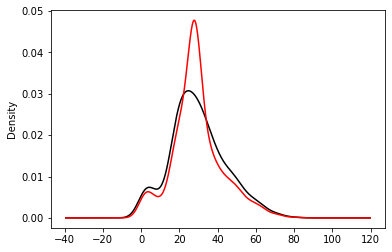

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color = 'black')
df1.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()


# Advatages and Disadvantages of Mean/Median Imputation
Advatages: 
    1. Easy to implement(Robust to Outliers)
    2. Faster way to obtain complete dataset
Disadvantages:
    1. Change or distortion in the variance



# 2. Random Sample Imputation
AIM:Random sample imputationconsists of taking random observation from the dataset and we use the observation to Replace the NAN values 

When should it be used? It assumes that the data are missing completely at random MCAR

In [21]:
rdf = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [22]:
rdf.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
rdf.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [24]:
rdf['Age'].dropna().sample(rdf['Age'].isnull().sum(),random_state=1)

689    15.0
278     7.0
506    33.0
9      14.0
494    21.0
       ... 
66     29.0
40     40.0
322    30.0
597    49.0
436    21.0
Name: Age, Length: 177, dtype: float64

In [25]:
def impute(df,variable,rmedian):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample

In [26]:
rmedian = rdf['Age'].median()

In [27]:
impute(rdf,'Age',rmedian)

In [28]:
rdf.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


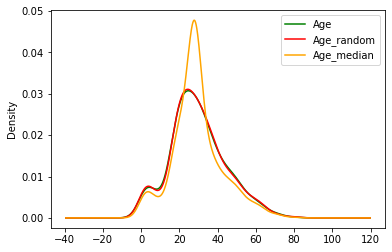

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
rdf['Age'].plot(kind='kde', ax=ax,color = 'green')
rdf.Age_random.plot(kind='kde', ax=ax, color='red')
rdf.Age_median.plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


1.easy to implement 
2.There is less distortion in variance 
Disadvantage 
1.Every situation randomness wont work

# 3. Capturing NaN values with a new feature.
It works well, if the data is not missing completely at random MNAR. 

In [30]:
nrdf = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [31]:
nrdf['Age_NaN'] = np.where(nrdf['Age'].isnull(),1,0)

In [32]:
nrdf.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [33]:
nrdf['Age'].fillna(df['Age'].median(),inplace=True)

In [34]:
nrdf.head(30)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# 4. End of distribution imputation

In [75]:
ddf = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [76]:
ddf.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

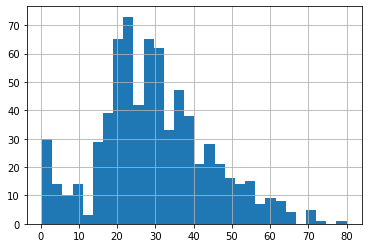

In [77]:
ddf.Age.hist(bins=30)

In [78]:
extreme = ddf.Age.mean()+3*ddf.Age.std()
extreme

73.27860964406095

In [79]:
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

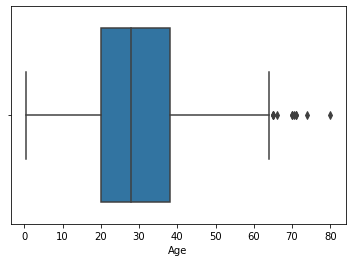

In [80]:
sns.boxplot('Age',data=ddf)

In [81]:
def impute_eodf_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [82]:
impute_eodf_nan(ddf,'Age',ddf['Age'].median(),extreme)

In [83]:
ddf.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

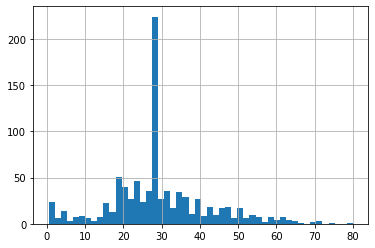

In [84]:
ddf.Age.hist(bins=50)

<AxesSubplot:>

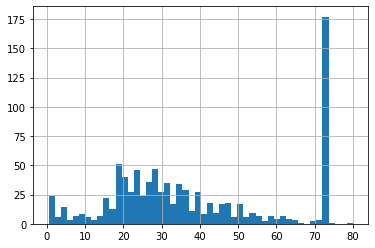

In [85]:
ddf['Age_end_distribution'].hist(bins=50)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

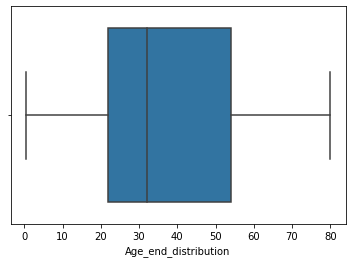

In [87]:
sns.boxplot('Age_end_distribution',data=ddf)